In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.inspection import DecisionBoundaryDisplay



In [2]:
iris = load_iris()
X = iris.data[:, :2]  # فقط دو ویژگی اول برای نمودار مرز تصمیم
y = iris.target

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(C=1e5, multi_class='multinomial', solver='lbfgs')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8222222222222222
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.78      0.54      0.64        13
   virginica       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45

Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


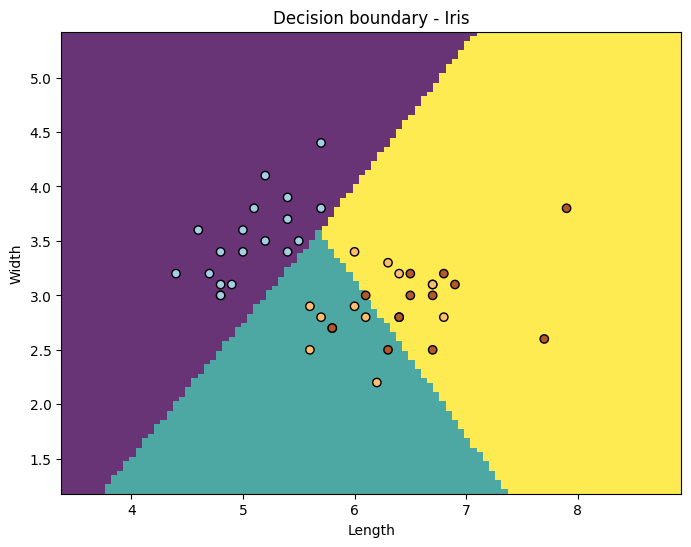

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
DecisionBoundaryDisplay.from_estimator(model, x_test, alpha=0.8, ax=ax, response_method="predict",
    plot_method="pcolormesh", shading="auto"
)

plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Length")
plt.ylabel("Width")
plt.title("Decision boundary - Iris")
plt.show()